the dataset is about  taken from UCI Machine Learning respository.

https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29#

In [6]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(caret)
install.packages("MLmetrics")
library(MLmetrics)
install.packages('e1071')
library(e1071)

Warning message:
“package ‘dplyr’ was built under R version 4.0.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggplot2’ was built under R version 4.0.3”
Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 4.0.3”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘MLmetrics’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


The following object is masked from ‘package:base’:

    Recall


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
# research Questions

1. how does Income/checking status affect the credit risk by different personal status sex?

In [13]:
credit_data<- read.table(file = 'SouthGermanCredit.asc', sep = '', header = TRUE, col.names=c("status", "duration", "credit_history", "purpose", "amount", "savings", "employment_duration",
                                                                                              "installment_rate","personal_status_sex", "other_debtors", "present_residence", "property",
                                                                                              "age", "other_installment_plans","housing", "number_credits","job", "people_liable", "telephone",
                                                                                              "foreign_worker","credit_risk"))

In [4]:
head(credit_data)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,⋯,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,18,4,2,1049,1,2,4,2,1,⋯,2,21,3,1,1,3,2,1,2,1
2,1,9,4,0,2799,1,3,2,3,1,⋯,1,36,3,1,2,3,1,1,2,1
3,2,12,2,9,841,2,4,2,2,1,⋯,1,23,3,1,1,2,2,1,2,1
4,1,12,4,0,2122,1,3,3,3,1,⋯,1,39,3,1,2,2,1,1,1,1
5,1,12,4,0,2171,1,3,4,3,1,⋯,2,38,1,2,2,2,2,1,1,1
6,1,10,4,0,2241,1,2,1,3,1,⋯,1,48,3,1,2,2,1,1,1,1


In [5]:
sum(is.na(credit_data)) # checking NA values

[1] 0

In [6]:
table(credit_data$credit_risk) # checking number of instances per category in target variable.


  0   1 
300 700 

In [7]:
str(credit_data)

'data.frame':	1000 obs. of  21 variables:
 $ status                 : int  1 1 2 1 1 1 1 1 4 2 ...
 $ duration               : int  18 9 12 12 12 10 8 6 18 24 ...
 $ credit_history         : int  4 4 2 4 4 4 4 4 4 2 ...
 $ purpose                : int  2 0 9 0 0 0 0 0 3 3 ...
 $ amount                 : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ savings                : int  1 1 2 1 1 1 1 1 1 3 ...
 $ employment_duration    : int  2 3 4 3 3 2 4 2 1 1 ...
 $ installment_rate       : int  4 2 2 3 4 1 1 2 4 1 ...
 $ personal_status_sex    : int  2 3 2 3 3 3 3 3 2 2 ...
 $ other_debtors          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ present_residence      : int  4 2 4 2 4 3 4 4 4 4 ...
 $ property               : int  2 1 1 1 2 1 1 1 3 4 ...
 $ age                    : int  21 36 23 39 38 48 39 40 65 23 ...
 $ other_installment_plans: int  3 3 3 3 1 3 3 3 3 3 ...
 $ housing                : int  1 1 1 1 2 1 2 2 2 1 ...
 $ number_credits         : int  1 2 1 2 2 2 2 1 2 1 ...


In [14]:
#changing the column values into str_categories
credit_data$other_installment_plans[credit_data$other_installment_plans %in% 1:3] <- c('bank','stores','none')[match(credit_data$other_installment_plans, 1:3, nomatch = 0)]
credit_data$housing[credit_data$housing %in% 1:3] <- c('for free','rent','none')[match(credit_data$housing, 1:3, nomatch = 0)]
credit_data$status[credit_data$status %in% 1:4] <- c('no checking account','< 0 DM','0<= ... < 200 DM','... >= 200 DM / salary for at least 1 year')[match(credit_data$status, 1:4, nomatch = 0)]

credit_data$credit_history[credit_data$credit_history %in% 0:4] <- c( "delays", "critical account", "no credits taken/all credits paid back fully",
  "credits paid back", "credits at this bank paid back ")[match(credit_data$credit_history, 0:4, nomatch = 0)]

credit_data$purpose[credit_data$purpose %in% 0:10] <- c( "others","car (new)", "car (used)","furniture/equipment","radio/television","domestic appliances",
  "repairs", "education", "vacation","retraining", "business")[match(credit_data$purpose, 0:10, nomatch = 0)]

credit_data$savings[credit_data$savings %in% 1:5] <-c("unknown/no savings account", "less than 100 DM", "100 <= ... <  500 DM", "500 <= ... < 1000 DM",
                                                                              "more than 1000 DM")[match(credit_data$savings, 1:5, nomatch = 0)]
credit_data$employment_duration[credit_data$employment_duration %in% 1:5] <- c(  "unemployed", "< 1 yr","1 <= ... < 4 yrs", "4 <= ... < 7 yrs", 
                      ">= 7 yrs")[match(credit_data$employment_duration, 1:5, nomatch = 0)]

credit_data$installment_rate[credit_data$installment_rate %in% 1:4] <- c(">= 35", "25 <= ... < 35","20 <= ... < 25","< 20")[match(credit_data$installment_rate, 1:4, nomatch = 0)]


credit_data$personal_status_sex[credit_data$personal_status_sex %in% 1:4] <- c( "male : divorced/separated","female : non-single or male : single","male : married/widowed",
                                                                               "female : single")[match(credit_data$personal_status_sex, 1:4, nomatch = 0)]

credit_data$other_debtors[credit_data$other_debtors %in% 1:3] <- c("none","co-applicant","guarantor")[match(credit_data$other_debtors, 1:3, nomatch = 0)]

credit_data$present_residence[credit_data$present_residence %in% 1:4] <- c("< 1 yr", "1 <= ... < 4 yrs", "4 <= ... < 7 yrs", ">= 7 yrs")[match(credit_data$present_residence, 1:4, nomatch = 0)]

credit_data$property[credit_data$property %in% 1:4] <-  c("unknown / no property","car or other","building soc. savings agr./life insurance",
                                                          "real estate")[match(credit_data$property, 1:4, nomatch = 0)]

credit_data$number_credits[credit_data$number_credits %in% 1:4] <- c("1", "2-3", "4-5", ">= 6")[match(credit_data$number_credits, 1:4, nomatch = 0)]

credit_data$job[credit_data$job %in% 1:4] <- c("unemployed/unskilled - non-resident","unskilled - resident","skilled employee/official",
                                               "manager/self-empl./highly qualif. employee")[match(credit_data$job, 1:4, nomatch = 0)]

credit_data$people_liable[credit_data$people_liable %in% 1:2] <- c("3 or more", "0 to 2")[match(credit_data$people_liable, 1:2, nomatch = 0)]

credit_data$telephone[credit_data$telephone %in% 1:2] <- c("no", "yes (under customer name)")[match(credit_data$telephone, 1:2, nomatch = 0)]

credit_data$foreign_worker[credit_data$foreign_worker %in% 1:2] <-  c("yes", "no")[match(credit_data$foreign_worker, 1:2, nomatch = 0)]




In [62]:
credit_data$credit_risk[credit_data$credit_risk %in% 0:1] <-  c("bad", "good")[match(credit_data$credit_risk, 0:1, nomatch = 2)]


In [77]:
credit_data2<-credit_data%>%
mutate(credit_history= recode(credit_history, "delays"='Not On Time/others Credit',"critical account"='Not On Time/others Credit',"no credits taken/all credits paid back fully"='On Time',
                                     "credits paid back"='On Time',"credits at this bank paid back "='On Time'))

In [225]:
str(credit_data)

'data.frame':	1000 obs. of  21 variables:
 $ status                 : chr  "no checking account" "no checking account" "< 0 DM" "no checking account" ...
 $ duration               : int  18 9 12 12 12 10 8 6 18 24 ...
 $ credit_history         : chr  "credits at this bank paid back " "credits at this bank paid back " "no credits taken/all credits paid back fully" "credits at this bank paid back " ...
 $ purpose                : chr  "car (used)" "others" "retraining" "others" ...
 $ amount                 : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ savings                : chr  "unknown/no savings account" "unknown/no savings account" "less than 100 DM" "unknown/no savings account" ...
 $ employment_duration    : chr  "< 1 yr" "1 <= ... < 4 yrs" "4 <= ... < 7 yrs" "1 <= ... < 4 yrs" ...
 $ installment_rate       : chr  "< 20" "25 <= ... < 35" "25 <= ... < 35" "20 <= ... < 25" ...
 $ personal_status_sex    : chr  "female : non-single or male : single" "male : married/

# exploratory data analysis

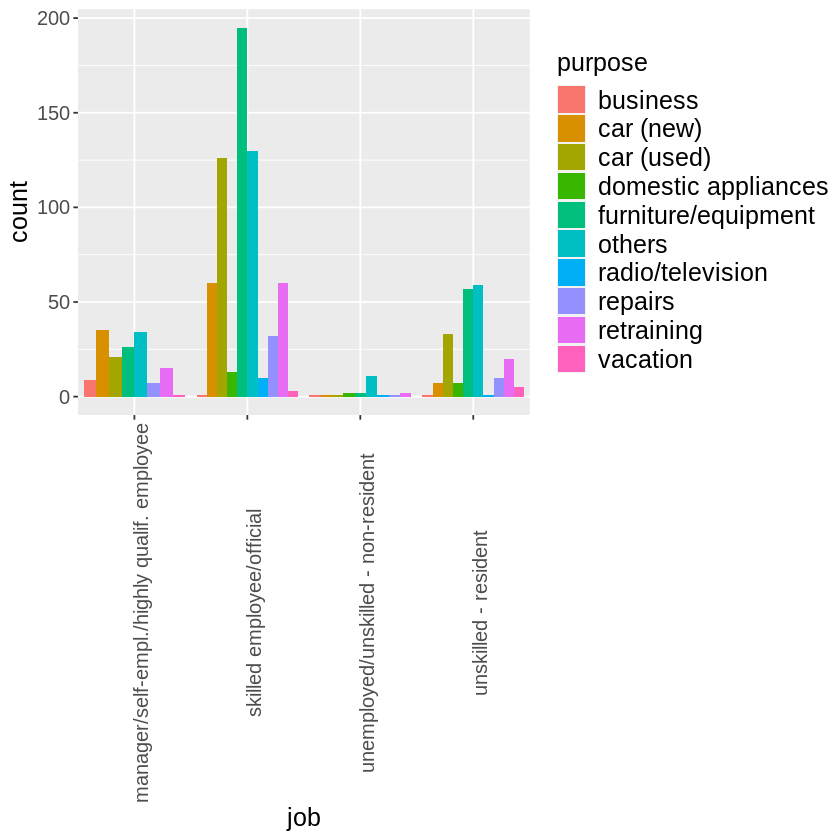

In [142]:
# Plot job/skill level vs count of purpose

ggplot(data = credit_data, aes(x = job, fill=purpose)) +
  geom_bar(position = "dodge")+ theme(legend.text = element_text(size = 15),text = element_text( size = 15),axis.text.x = element_text(angle = 90))+scale_x_discrete(expand=c(0.1,0.2))

In [104]:
# AVG credits given to individuals for diff. purposes per job/skill level

credit_data1<-credit_data%>%select(credit_history,amount,job)%>%group_by(job,credit_history)%>%summarise(Average_credits = mean(amount), .groups = "keep") %>% arrange(job,credit_history,desc(Average_credits))

In [105]:
head(credit_data1)

job,credit_history,Average_credits
<chr>,<chr>,<dbl>
manager/self-empl./highly qualif. employee,credits at this bank paid back,5244.619
manager/self-empl./highly qualif. employee,credits paid back,5232.111
manager/self-empl./highly qualif. employee,critical account,7272.667
manager/self-empl./highly qualif. employee,delays,8447.200
manager/self-empl./highly qualif. employee,no credits taken/all credits paid back fully,5166.365
skilled employee/official,credits at this bank paid back,2859.092


In [11]:
#%>% mutate(age=if_else(age <= 30,'age group 19-30',if_else(age > 55,'age group above 55','age group 31-55')))

In [12]:
head(credit_data2)

,duration,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,⋯,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,checking_ACC_status,history_credit_payment_status
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,18,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,⋯,none,for free,1,skilled employee/official,0 to 2,no,no,good,no checking account,On Time
2,9,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,⋯,none,for free,2-3,skilled employee/official,3 or more,no,no,good,no checking account,On Time
3,12,retraining,841,less than 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,⋯,none,for free,1,unskilled - resident,0 to 2,no,no,good,< 0 DM,On Time
4,12,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,⋯,none,for free,2-3,unskilled - resident,3 or more,no,yes,good,no checking account,On Time
5,12,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,⋯,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good,no checking account,On Time
6,10,others,2241,unknown/no savings account,< 1 yr,>= 35,male : married/widowed,none,4 <= ... < 7 yrs,unknown / no property,⋯,none,for free,2-3,unskilled - resident,3 or more,no,yes,good,no checking account,On Time


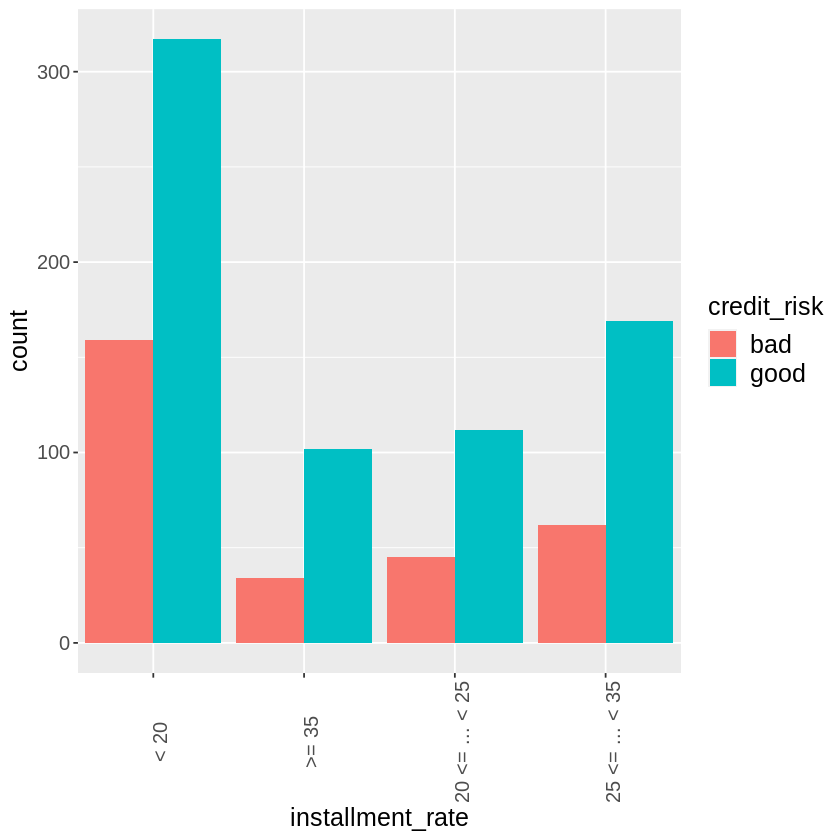

In [140]:
# Plot Installment rate vs Credit risk

ggplot(data = credit_data, aes(x = installment_rate, fill=credit_risk)) +
  geom_bar(position = "dodge")+ theme(legend.text = element_text(size = 15),text = element_text( size = 15),axis.text.x = element_text(angle = 90))+scale_x_discrete(expand=c(0.1,0.2))

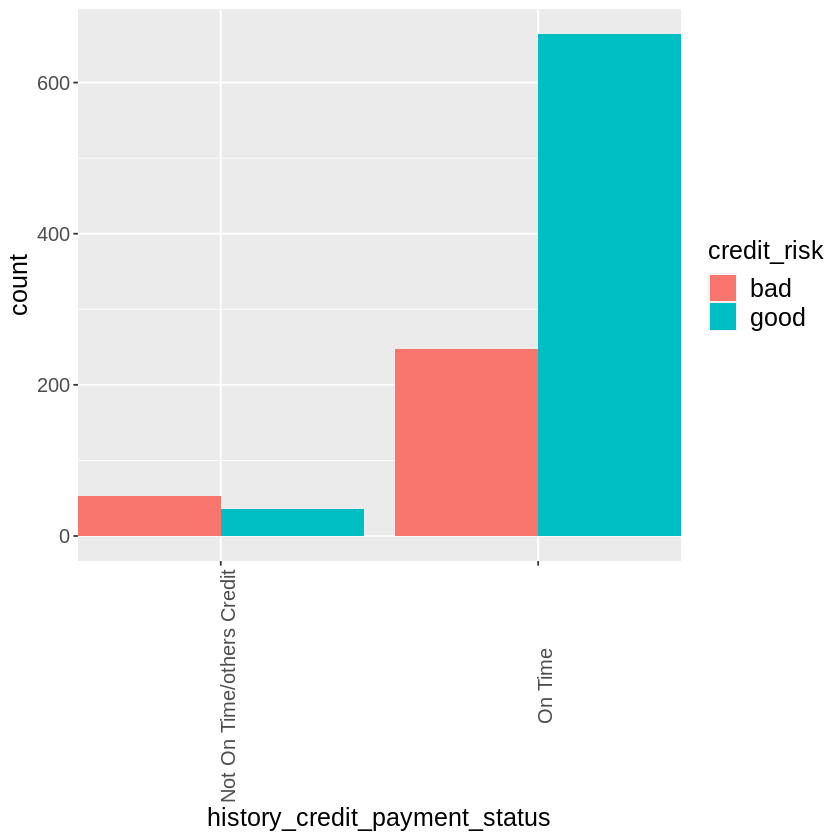

In [139]:
# Plot Credit history for payments vs Credit risk

ggplot(data = credit_data2, aes(x = history_credit_payment_status, fill=credit_risk)) +
  geom_bar(position = "dodge")+ theme(legend.text = element_text(size = 15),text = element_text( size = 15),axis.text.x = element_text(angle = 90))+scale_x_discrete(expand=c(0.1,0.2))

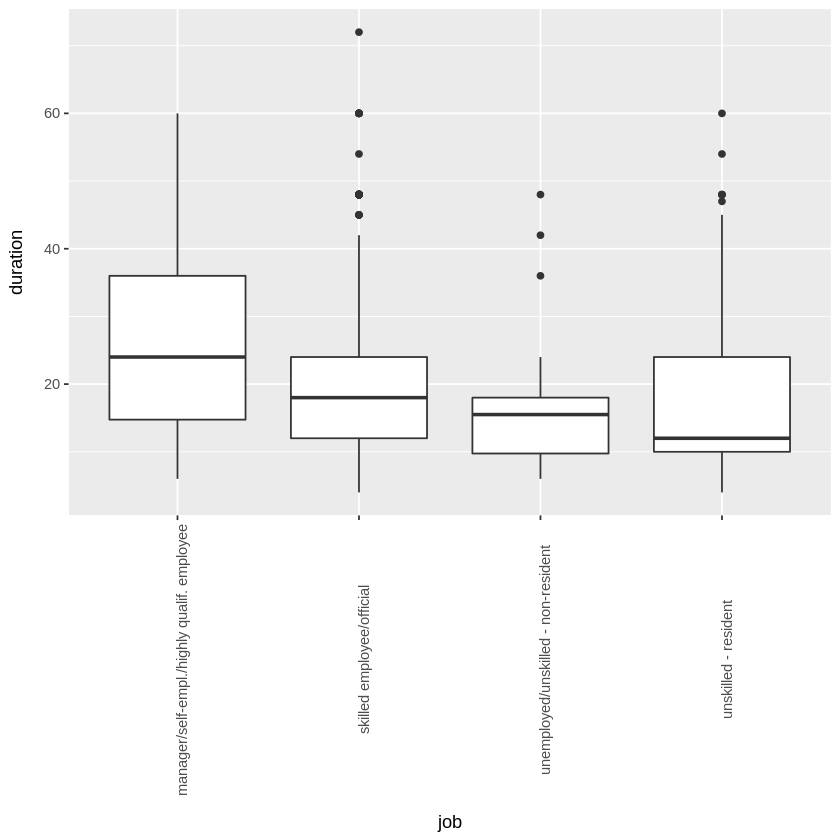

In [204]:
#Plot duration of credits month vs credit_risk


ggplot(data = credit_data2, aes(x = ch, y = duration)) +
  geom_boxplot() +
  theme(axis.title.x = element_text(margin = unit(c(0.4, 0, 0, 0), "cm")),
    axis.title.y = element_text(margin = unit(c(0, 0.4, 0, 0), "cm")),axis.text.x = element_text(angle = 90))

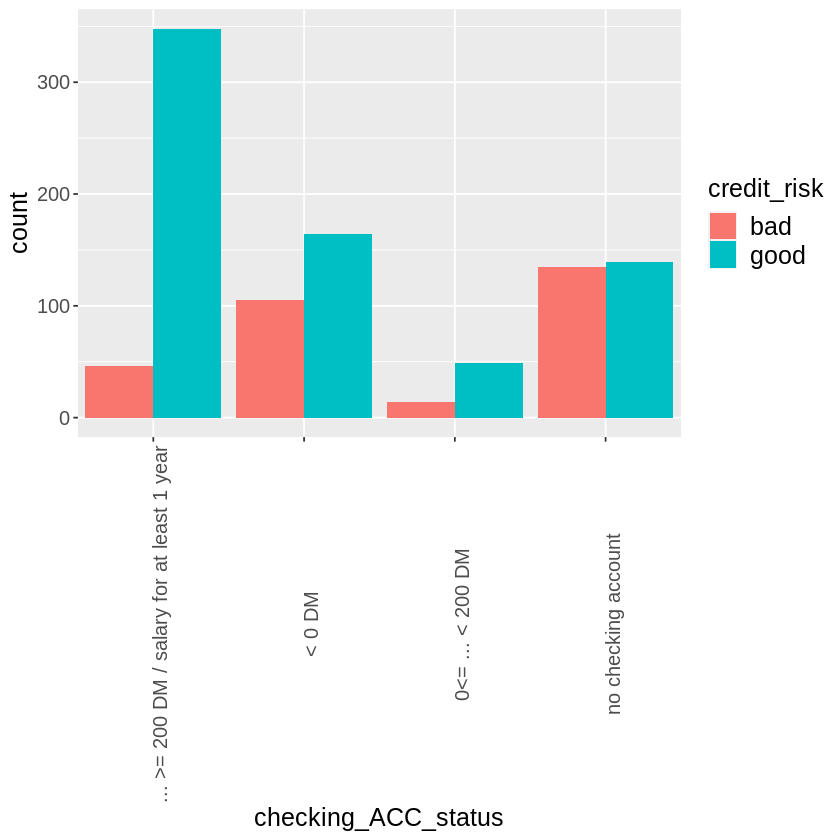

In [102]:
#3 For chk_acct we see that, the current status of the checking account matters as the frequency of the response variables is seen to differ from one sub category to another
# plot Checking_Account_Status   vs credit_risk

ggplot(data = credit_data2, aes(x = checking_ACC_status, fill=credit_risk)) +
  geom_bar(position = "dodge")+ theme(legend.text = element_text(size = 15),text = element_text( size = 15),axis.text.x = element_text(angle = 90))+scale_x_discrete(expand=c(0.1,0.2))

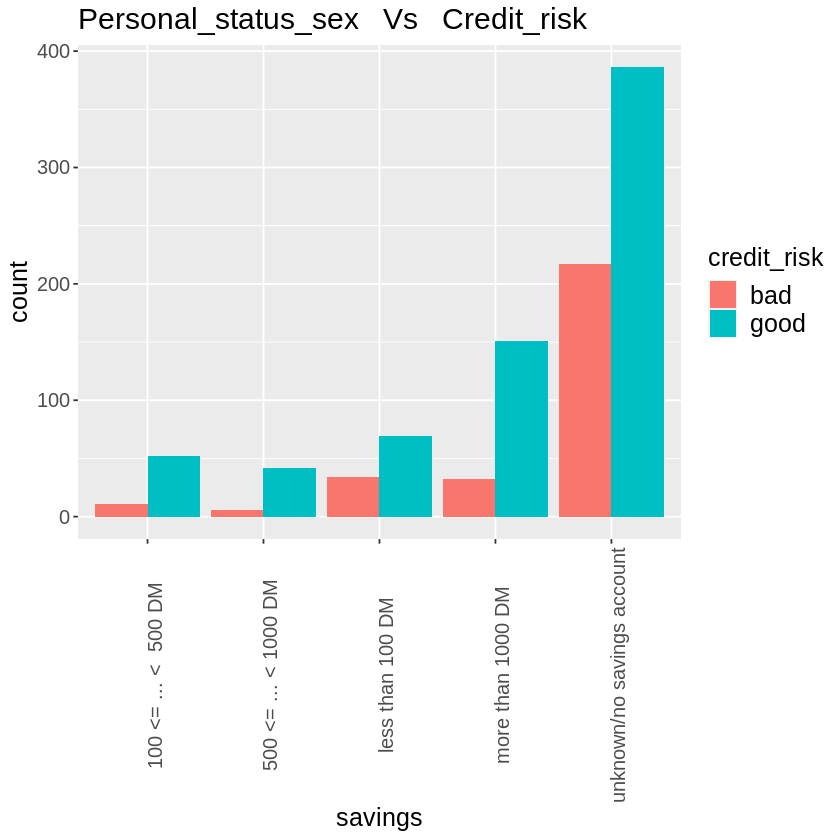

In [30]:
# plot personal_status_sex   vs credit_risk

ggplot(data = credit_data, aes(x = credit_history, fill=credit_risk)) +
  geom_bar(position = "dodge")+ theme(legend.text = element_text(size = 15),text = element_text( size = 15),axis.text.x = element_text(angle = 90))+scale_x_discrete(expand=c(0.1,0.2))+
  ggtitle("Credit History   Vs   Credit_risk")


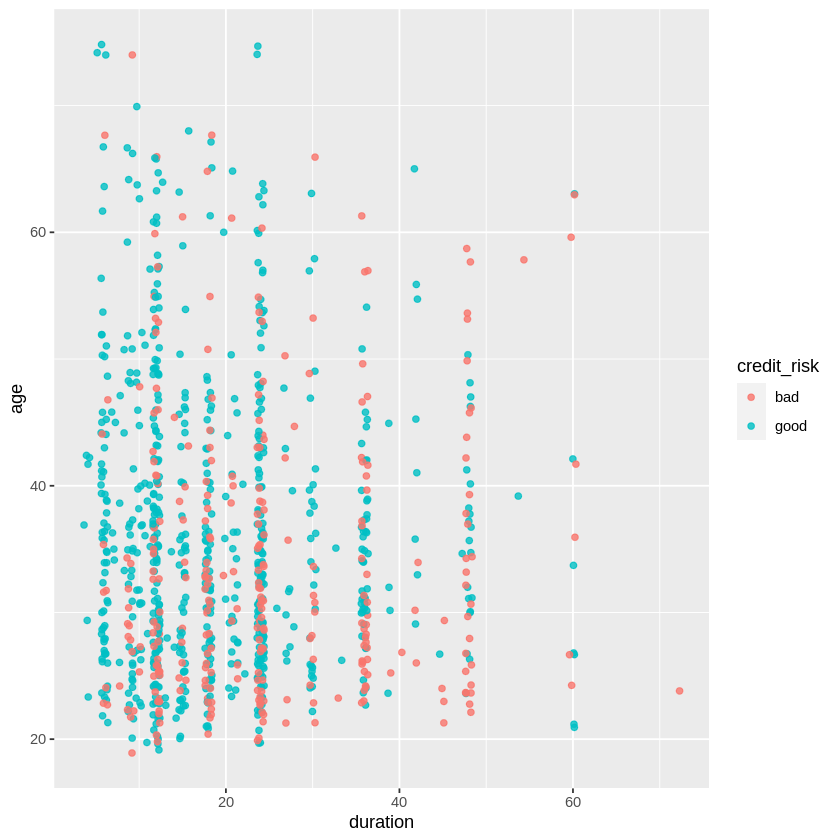

In [99]:
#1
ggplot(data = credit_data, aes(x = duration, y = age)) +
  geom_point(aes(color = credit_risk),position = "jitter",, alpha = 0.8)

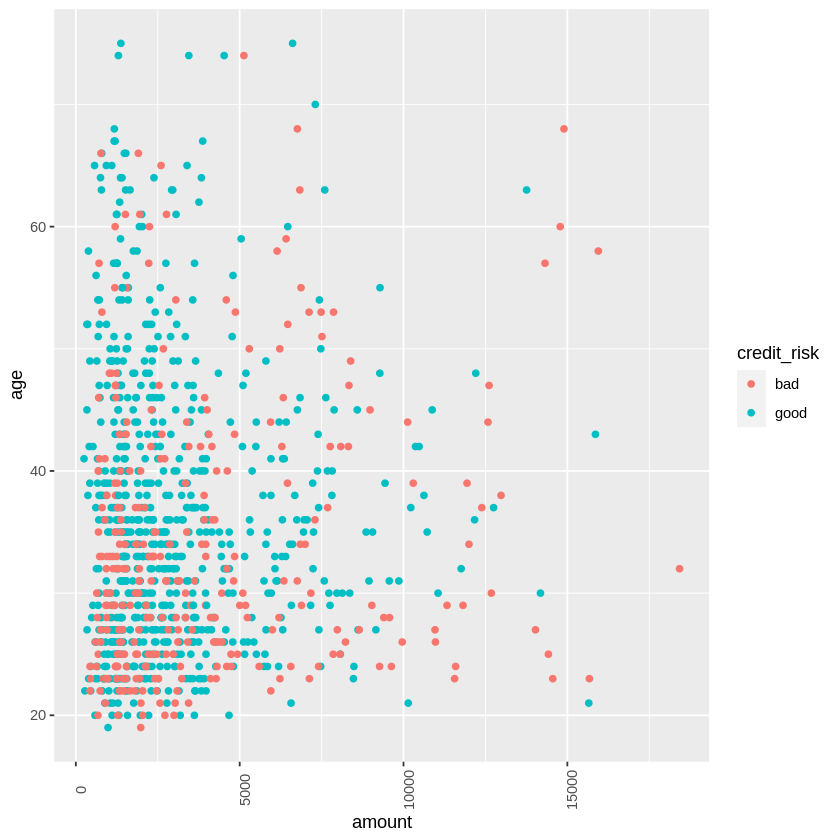

In [100]:
#2
ggplot(data = credit_data, aes(x = amount, y = age)) +
  geom_point(aes(color = credit_risk))+theme(axis.text.x = element_text(angle = 90))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



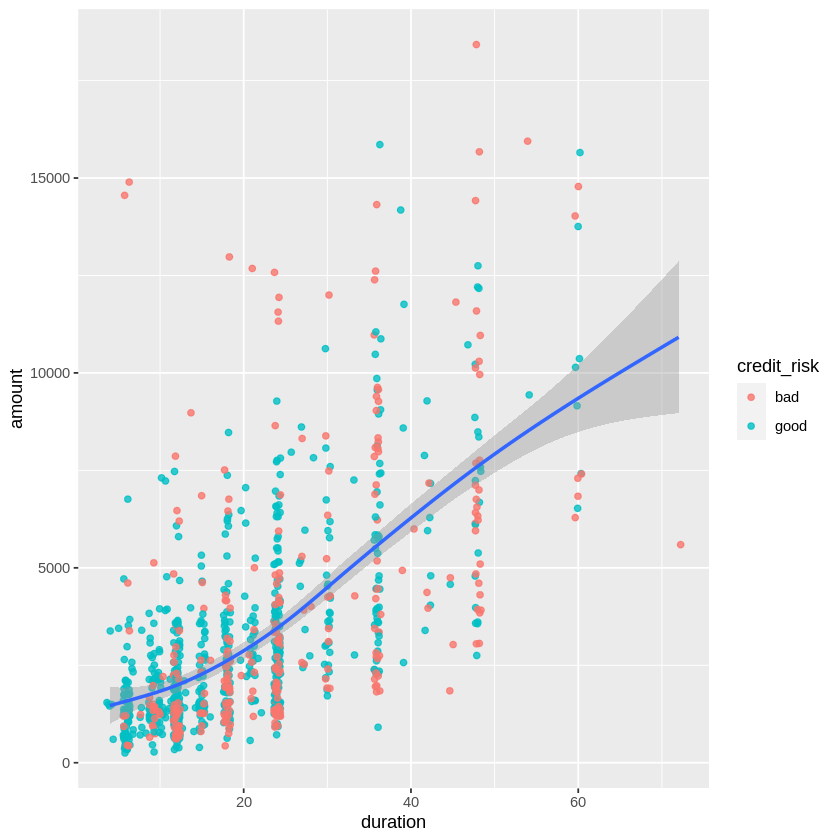

In [108]:
#4 linear result
ggplot(data = credit_data, aes(x = duration, y = amount)) +
  geom_point(aes(color = credit_risk),position = "jitter",, alpha = 0.8)+geom_smooth()

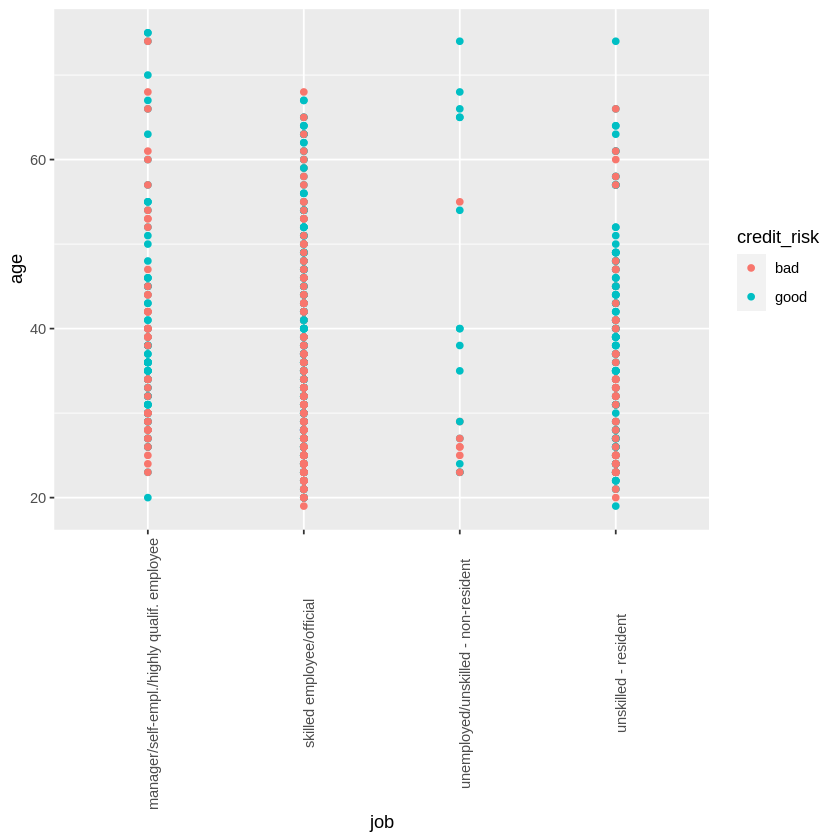

In [92]:
ggplot(data = credit_data, aes(x = job, y = age)) +
  geom_point(aes(color = credit_risk))+theme(axis.text.x = element_text(angle = 90))

In [55]:
str(credit_data2)

'data.frame':	1000 obs. of  21 variables:
 $ duration                     : int  18 9 12 12 12 10 8 6 18 24 ...
 $ purpose                      : chr  "car (used)" "others" "retraining" "others" ...
 $ amount                       : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ savings                      : chr  "unknown/no savings account" "unknown/no savings account" "less than 100 DM" "unknown/no savings account" ...
 $ employment_duration          : chr  "< 1 yr" "1 <= ... < 4 yrs" "4 <= ... < 7 yrs" "1 <= ... < 4 yrs" ...
 $ installment_rate             : chr  "< 20" "25 <= ... < 35" "25 <= ... < 35" "20 <= ... < 25" ...
 $ personal_status_sex          : chr  "female : non-single or male : single" "male : married/widowed" "female : non-single or male : single" "male : married/widowed" ...
 $ other_debtors                : chr  "none" "none" "none" "none" ...
 $ present_residence            : chr  ">= 7 yrs" "1 <= ... < 4 yrs" ">= 7 yrs" "1 <= ... < 4 yrs" ...
 $ pr

In [176]:
table(credit_data2$credit_risk)


  0   1 
300 700 

# Splitting Data

In [11]:
##Split_data

set.seed(1)
split_data <- createDataPartition(y = credit_data2$credit_risk, p = 0.70, list = FALSE)
train_set <- credit_data2[split_data, ]
test_set <- credit_data2[-split_data, ]

# Model 1 : Logistic R

In [52]:
(credit_data2$personal_status_sex)

[1] "female : non-single or male : single"
[2] "male : married/widowed"              
[3] "female : single"                     
[4] "male : divorced/separated"

In [ ]:
age+duration+checking_ACC_status+amount+savings+installment_rate+history_credit_payment_status+personal_status_sex   

In [46]:
set.seed(1)
logit <- train(credit_risk ~age+duration+checking_ACC_status+amount+savings+installment_rate+history_credit_payment_status+personal_status_sex   ,
  method = "glm",
  family = binomial(link = "logit"), data = train_set,
  trControl = trainControl(method = "cv", number = 5,summaryFunction = prSummary,classProbs = TRUE,sampling='up'),preProcess = c("center", "scale"),metric="AUC"
)

In [47]:
logit

Generalized Linear Model 

700 samples
  8 predictor
  2 classes: 'bad', 'good' 

Pre-processing: centered (17), scaled (17) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 560, 560, 560, 560, 560 
Addtional sampling using up-sampling prior to pre-processing

Resampling results:

  AUC        Precision  Recall     F        
  0.5688977  0.5050762  0.7285714  0.5931856


In [48]:
summary(logit)


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.28698  -0.87155  -0.00429   0.87009   2.18903  

Coefficients:
                                                Estimate Std. Error z value
(Intercept)                                     0.024717   0.075817   0.326
age                                             0.137783   0.081919   1.682
duration                                       -0.483555   0.109886  -4.401
`checking_ACC_status< 0 DM`                    -0.803275   0.092389  -8.694
`checking_ACC_status0<= ... < 200 DM`          -0.222413   0.075743  -2.936
`checking_ACC_statusno checking account`       -0.907976   0.092333  -9.834
amount                                         -0.260943   0.117862  -2.214
`savings500 <= ... < 1000 DM`                   0.060501   0.102660   0.589
`savingsless than 100 DM`                      -0.064343   0.128191  -0.502
`savingsmore than 1000 DM`                      0.083222   0.142408   0.584
`savingsunkno

In [49]:
predicted_outcomes_logit <- predict(logit, test_set)
confusionM_logit<-confusionMatrix(predicted_outcomes_logit,as.factor(test_set$credit_risk),positive='good')
confusionM_logit

Confusion Matrix and Statistics

          Reference
Prediction bad good
      bad   65   79
      good  25  131
                                          
               Accuracy : 0.6533          
                 95% CI : (0.5965, 0.7071)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.9648          
                                          
                  Kappa : 0.2954          
                                          
 Mcnemar's Test P-Value : 2.024e-07       
                                          
            Sensitivity : 0.6238          
            Specificity : 0.7222          
         Pos Pred Value : 0.8397          
         Neg Pred Value : 0.4514          
             Prevalence : 0.7000          
         Detection Rate : 0.4367          
   Detection Prevalence : 0.5200          
      Balanced Accuracy : 0.6730          
                                          
       'Positive' Class : good            
                           

In [50]:
confusionM_logit$byClass[c('Precision','Recall')]

Precision    Recall 
0.8397436 0.6238095

# interpretation of results

# MODEL 2: KNN

In [45]:
set.seed(1)
knn_credit_risk_prediction <- train(credit_risk ~ age+duration+checking_ACC_status+amount+savings+installment_rate+history_credit_payment_status+personal_status_sex   ,
  method = 'knn', data = train_set,
  trControl = trainControl(method = "repeatedcv", number = 10,repeats=3,returnResamp = "all",summaryFunction = prSummary,classProbs = TRUE,sampling = "up"),tuneGrid = data.frame(k = seq(1, 28)), metric="AUC")

In [51]:
knn_credit_risk_prediction

k-Nearest Neighbors 

700 samples
  8 predictor
  2 classes: 'bad', 'good' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 630, 630, 630, 630, 630, 630, ... 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  k   AUC        Precision  Recall     F        
   1  0.2062447  0.3496385  0.3539683  0.3499040
   2  0.2309461  0.3493782  0.5222222  0.4174878
   3  0.2722146  0.3453558  0.5682540  0.4279298
   4  0.2980083  0.3383483  0.5698413  0.4233590
   5  0.3218077  0.3497766  0.5936508  0.4386001
   6  0.3284352  0.3360469  0.5603175  0.4184704
   7  0.3455050  0.3346440  0.5730159  0.4207278
   8  0.3556632  0.3308884  0.5619048  0.4142738
   9  0.3454435  0.3251603  0.5523810  0.4078247
  10  0.3450740  0.3185609  0.5412698  0.3996542
  11  0.3332960  0.3089333  0.5380952  0.3909575
  12  0.3432839  0.3156172  0.5349206  0.3951914
  13  0.3459528  0.3117783  0.5269841  0.3903837
  14  0.3314945  0

In [52]:
predicted_outcomes_knn <- predict(knn_credit_risk_prediction, test_set)
confusionM_knn<-confusionMatrix(predicted_outcomes_knn,as.factor(test_set$credit_risk))
confusionM_knn

Confusion Matrix and Statistics

          Reference
Prediction bad good
      bad   50  105
      good  40  105
                                          
               Accuracy : 0.5167          
                 95% CI : (0.4585, 0.5745)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0461          
                                          
 Mcnemar's Test P-Value : 1.067e-07       
                                          
            Sensitivity : 0.5556          
            Specificity : 0.5000          
         Pos Pred Value : 0.3226          
         Neg Pred Value : 0.7241          
             Prevalence : 0.3000          
         Detection Rate : 0.1667          
   Detection Prevalence : 0.5167          
      Balanced Accuracy : 0.5278          
                                          
       'Positive' Class : bad             
                           

In [53]:
confusionM_knn$byClass[c('Precision','Recall')]

Precision    Recall 
0.3225806 0.5555556

In [54]:
confusionM_knn$byClass

Sensitivity          Specificity       Pos Pred Value 
           0.5555556            0.5000000            0.3225806 
      Neg Pred Value            Precision               Recall 
           0.7241379            0.3225806            0.5555556 
                  F1           Prevalence       Detection Rate 
           0.4081633            0.3000000            0.1666667 
Detection Prevalence    Balanced Accuracy 
           0.5166667            0.5277778

# MODEL 3: RANDOM FOREST

In [36]:
control <- trainControl(method="cv", number=5,summaryFunction = prSummary,classProbs = TRUE,sampling='up')

In [43]:

set.seed(1)
rf_credit_risk_prediction <- train(credit_risk ~ age+duration+checking_ACC_status+amount+savings+installment_rate+history_credit_payment_status+personal_status_sex,
  method = 'avNNet', data = train_set,strata=train_set$credit_risk,
  trControl = control)

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. AUC will be used instead.”


Fitting Repeat 1 

# weights:  22
initial  value 418.839660 
final  value 392.000000 
converged
Fitting Repeat 2 

# weights:  22
initial  value 397.719351 
final  value 392.000000 
converged
Fitting Repeat 3 

# weights:  22
initial  value 393.213348 
final  value 392.000000 
converged
Fitting Repeat 4 

# weights:  22
initial  value 438.440886 
final  value 392.000000 
converged
Fitting Repeat 5 

# weights:  22
initial  value 425.749543 
final  value 392.000000 
converged
Fitting Repeat 1 

# weights:  62
initial  value 395.303788 
iter  10 value 366.712556
iter  20 value 345.387406
iter  30 value 297.473102
iter  40 value 281.244243
iter  50 value 269.553428
iter  60 value 262.356867
iter  70 value 260.830344
iter  80 value 260.663759
iter  90 value 260.596209
iter 100 value 260.086753
final  value 260.086753 
stopped after 100 iterations
Fitting Repeat 2 

# weights:  62
initial  value 452.479038 
final  value 392.000000 
converged
Fitting Repeat 3 

# weights:  62
initial  value 

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


Something is wrong; all the AUC metric values are missing:
      AUC        Precision          Recall             F         
 Min.   : NA   Min.   :0.3000   Min.   :0.2000   Min.   :0.4615  
 1st Qu.: NA   1st Qu.:0.3481   1st Qu.:0.4000   1st Qu.:0.4848  
 Median : NA   Median :0.3960   Median :0.5905   Median :0.5215  
 Mean   :NaN   Mean   :0.4156   Mean   :0.5413   Mean   :0.5289  
 3rd Qu.: NA   3rd Qu.:0.5121   3rd Qu.:0.6905   3rd Qu.:0.5863  
 Max.   : NA   Max.   :0.5323   Max.   :0.7238   Max.   :0.5974  
 NA's   :9                                                       


ERROR: Error: Stopping


In [44]:
predicted_outcomes_RF <- predict(rf_credit_risk_prediction, test_set)
confusionM_RF<-confusionMatrix(predicted_outcomes_RF,as.factor(test_set$credit_risk),positive='good')
confusionM_RF

Confusion Matrix and Statistics

          Reference
Prediction bad good
      bad   62   83
      good  28  127
                                          
               Accuracy : 0.63            
                 95% CI : (0.5726, 0.6848)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.9961          
                                          
                  Kappa : 0.25            
                                          
 Mcnemar's Test P-Value : 2.968e-07       
                                          
            Sensitivity : 0.6048          
            Specificity : 0.6889          
         Pos Pred Value : 0.8194          
         Neg Pred Value : 0.4276          
             Prevalence : 0.7000          
         Detection Rate : 0.4233          
   Detection Prevalence : 0.5167          
      Balanced Accuracy : 0.6468          
                                          
       'Positive' Class : good            
                           

In [39]:
confusionM_RF$table

          Reference
Prediction bad good
      bad   62   83
      good  28  127

In [40]:
confusionM_RF$byClass[c('Precision','Recall')]

Precision    Recall 
0.8193548 0.6047619